<small><small><i>
All the IPython Notebooks in **[Python Seaborn Module](https://github.com/milaan9/12_Python_Seaborn_Module)** lecture series by **[Dr. Milaan Parmar](https://www.linkedin.com/in/milaanparmar/)** are available @ **[GitHub](https://github.com/milaan9)**
</i></small></small>

<a href="https://colab.research.google.com/github/milaan9/12_Python_Seaborn_Module/blob/main/006_Seaborn_Scatter_Plot_and_Joint_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scatter Plot and Joint Plot

This lecture is going to be pretty much in continuation to our previous lecture on *Linear Regression* plots where we have already worked comprehensively on various **Scatterplots**. The new concept that we shall look into today is **Joint plot** and shall simultaneously touch-base Scatter plots as well with few examples.

**Scatter plots** are identical to Line graphs that show how much one variable is affected by presence of another and this relationship between two variables is statistically termed as their **correlation**. As we've previously observed, closer the data points come when plotted to making a straight line, higher the correlation between those two variables, thus making their relationship stronger.

So, if the data points make a straight line going from the origin out to high **`x`** and **`y`** values, then variables are said to have a **positive correlation** BUT if a line goes from a high value on y-axis down to a high value on the x-axis, then the  variables have a **negative correlation**.

This correlation generally ranges from **-1** to **1**, deciding whether it's positive or not. And the best fitting, or say, highly accurate line is commonly measured using LSR, i.e. **Least Squares Regression**. Apart from correlation, another statistically relevant concept to be noted with Scatterplots is **(Linear)Interpolation** and **Extrapolation**.

Just to give you an overview, *Interpolation* is where we try to find a value inside our set of available data points; whereas, *Extrapolation* is where we find a value outside our set of data points. Hence, it is always advised to be careful with Extrapolation because it may fetch misleading results as we are in *uncharted territory* or in simpler words, dealing with assumptions.

On the other hand, in simpler words, **Correlation** is:
- **Positive** when the values increase together.
- **Negative** when one value decreases as the other increases.

Actually these are *statistical* concepts and I don't really have to deal with them in a *Seaborn course* but I know how important it is to have a good understanding of these concepts, and not everyone comes from a statistical background. You would often find me trying to get you at least acquainted with those terms, so that you know what is being discussed and how to infer.

Let us revisit *Scatterplot* with a dummy dataset just to quickly visualize these two mathematical terms on a plot; and note that these concepts shall remain similar, be it Seaborn, Matplotlib, Bokeh, Plotly, or whichever tool you're using to plot your data. The dataset that I would be using for this demonstration is available for you in the **Resources** folder.

In [1]:
# Importing intrinsic libraries:
import numpy as np
import pandas as pd
np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading Dataset:
labour = pd.read_csv("datasets/Labour Data.csv")

# Checking features(columns) in the dataset:
labour.columns

Index(['Country', 'Annual Income', 'Average Family members', 'Birth Rate'], dtype='object')

In [3]:
# Fetching dataset preview:
labour.head(10)

,Country,Annual Income,Average Family members,Birth Rate
0,Lithuania,22949,2,10.10
1,Latvia,22389,4,9.70
2,Hungary,22911,4,9.80
3,Luxembourg,62636,3,3.85
4,United States,60154,3,3.90
5,Switzerland,60124,4,4.30
6,Denmark,52580,3,7.70
7,Australia,52063,3,5.20
8,Ireland,51681,4,8.50
9,Belgium,49587,2,8.70


In [4]:
# Obtaining generic mathematical details:
labour.describe()

,Annual Income,Average Family members,Birth Rate
count,38.000000,38.000000,38.000000
mean,37644.947368,3.289474,8.261842
std,14003.490625,0.835299,3.202563
min,12940.000000,2.000000,3.850000
25%,24677.750000,3.000000,6.025000
50%,38223.000000,3.000000,8.250000
75%,49291.000000,4.000000,9.250000
max,62636.000000,5.000000,19.000000


Let us now try to visualize Birth Rate against Average annual income using our Scatterplot:

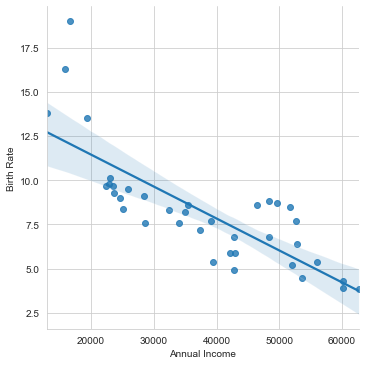

In [5]:
sns.lmplot(x="Annual Income", y="Birth Rate", data=labour)

Before I get into discussing more on the mathematical terms, let me give away something that will always be useful for you even in production. This is a **list of Tableau colors** that is available in Matplotlib and can be used in Seaborn as well, as guided earlier in Aesthetics lecture. Let us set it up:

In [6]:
tableau_20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
         (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
         (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
         (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
         (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scaling avove RGB values to [0, 1] range, which is Matplotlib acceptable format:
for i in range(len(tableau_20)):
    r, g, b = tableau_20[i]
    tableau_20[i] = (r / 255., g / 255., b / 255.)

In [7]:
tableau_20[4]

(0.17254901960784313, 0.6274509803921569, 0.17254901960784313)

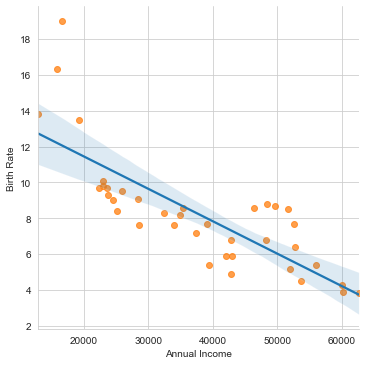

In [8]:
sns.lmplot(x="Annual Income", y="Birth Rate", data=labour, scatter_kws={'color':tableau_20[2], 'alpha':0.75})

Looking at this plot, we can easily say: As the **Annual income** increases in a country, the corresponding **Birth rate** automatically decreases in general. Certainly there are few outliers (like Bangladesh, etc.) as well that we can see at top left, where the income is low but corresponding Birth Rate is exceptionally high. Note that here I have tried to plot a *linear line* across this dataset, so this fit isn't the best. May be a *curved line* would have better tried to cover all the data points, that you may experiment with, as your homework. 

In terms of values, we may easily say that the mean should be around an *Annual Income* of around $39,000.00 with respective *Birth Rate* close to 7.5. If we compare it with our mathematical stats, we do see a close comparision with **`.describe()`** method on our dummy dataset. In terms of parameters, **`scatter_kws`** helps us control the appearance of the *scattered data points* on our plot, using Matplotlib **`plt.scatter`** format. And, if we add **`line_kws`**, it would do the same for our *line or curve* passing through these data points. Additionally, the **`color`** parameter assigns the color and **`alpha`** determines transparency.

Well that pretty much ends our discussion on **Scatterplot** in particular, but time and again we shall keep revisiting as and when required. Let us now move ahead into another type of plot that presents the **Logistic Regression** aspect quite well. As mentioned earlier, this is going to be **Joint Plot** and this time let us begin with implementation before we delve into discussing it's various aspects.

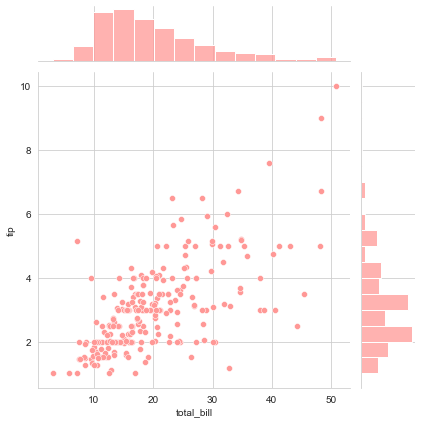

In [9]:
# Loading Built-in Dataset:
tips = sns.load_dataset("tips")

# Plotting a simple Jointplot:
sns.jointplot(x="total_bill", y="tip", data=tips, color=tableau_20[7])

We already aware of the scattered distribution here so let us focus on what we have at top at and right spines. By the way, if we wish to reduce the size of scattered dots in our plot, we may chose to add **sizes** parameter as a *Tuple* like **`sns.jointplot(x="total_bill", y="tip", data=tips, color=tableau_20[7], kind="scatter", sizes=(20,0))`**. These spines represent **[Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution)** of a **sample space**, which in our case comprises of *Total bill* and associated *tips* from our dataset. Let us fit the **Density curve** on top of it, that we had observed in the introductory lectures as well and while we do that, simultaneously we shall also switch from scattered distribution to something different:

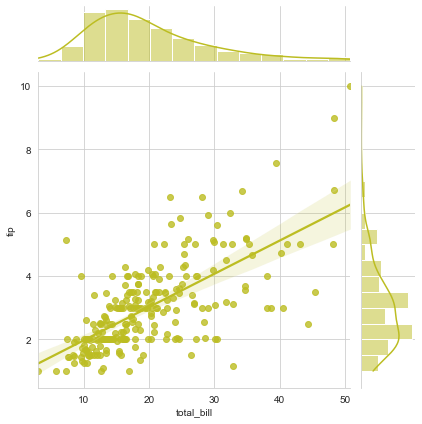

In [10]:
sns.jointplot("total_bill", "tip", data=tips, kind="reg", color=tableau_20[16])

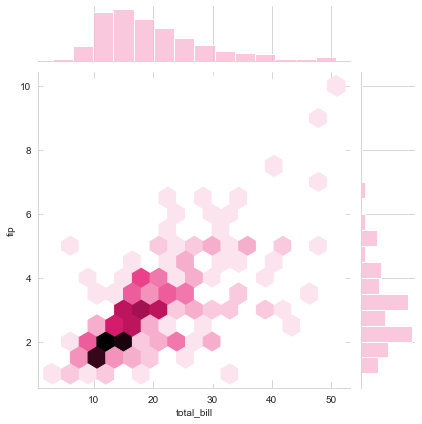

In [11]:
sns.jointplot("total_bill", "tip", data=tips, kind="hex", color=tableau_20[13])

The area below the **density curve** on the **histogram** is what statistically helps in calculating the PDF, i.e. **Probability Density function** and the highest peak of the curve is the **mean of distribution**. **Gaussian** or **Normal** or **Binomial ditribution** is an age-old statistical concept that requires good amount of study to understand each and every aspect of it but what I told you is roughly the gist of it.

Next what we see above is just a variation in type of plot and is commonly termed as **hexagonal bins**, which replaces scatter dots to fill in for our data points. We may also replace these with Contour maps like this:

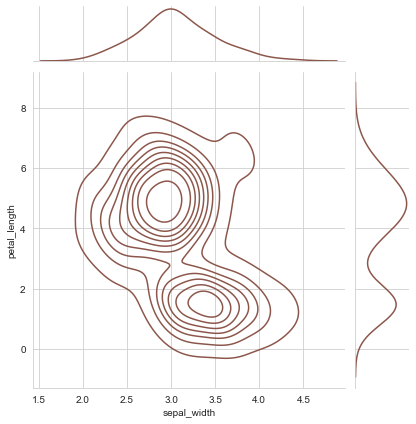

In [12]:
# Loading Iris dataset:
iris = sns.load_dataset("iris")

# Replace the scatterplots and histograms with density estimates and align the marginal Axes tightly with joint Axes:
sns.jointplot("sepal_width", "petal_length", data=iris, kind="kde", space=0.2, color=tableau_20[10])

Now let us try to plot *two distributions* in a Jointplot:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


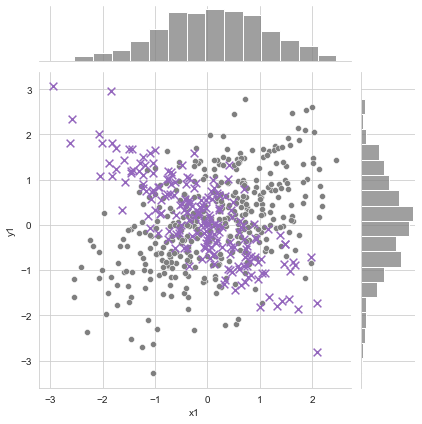

In [13]:
# Generating random data:
data1 = np.random.multivariate_normal([0,0], [[1,0.5],[0.5,1]], size=400)
data2 = np.random.multivariate_normal([0,0], [[1,-0.8],[-0.8,1]], size=200)

# Both df1 and df2 have bivaraite normals, df1.size=200, df2.size=100
df1 = pd.DataFrame(data1, columns=['x1', 'y1'])
df2 = pd.DataFrame(data2, columns=['x2', 'y2'])

# Plotting the figure: 
graph = sns.jointplot(x= df1.x1, y= df1.y1, color=tableau_20[14])

graph.x = df2.x2
graph.y = df2.y2
graph.plot_joint(plt.scatter, marker='x', c=tableau_20[8], s=60)

Please do note that **Jointplot** is a **[figure-level function](http://seaborn.pydata.org/tutorial/axis_grids.html)** so it can't coexist in a figure with other plots. But we do have our **kdeplot** function which can draw a *2-d KDE* onto specific Axes.

I have also attached a link to an article in this lecture associated notebook where you can read in-depth about **[Gaussian Distribution](http://mathworld.wolfram.com/NormalDistribution.html)** to gain better insight to what gets plotted on the top and right axes but do note that it involves extensive mathematical calculations and requires a background in **Linear Algebra** and **Probability** to understand the underlying computations.

And for **`color`** choices, I have attached an image of available colors that you may use in all your Seaborn plots as it has underlying Matplotlib effect. The attachment shall also display shade preview for your convenience. Let me give you a preview here:

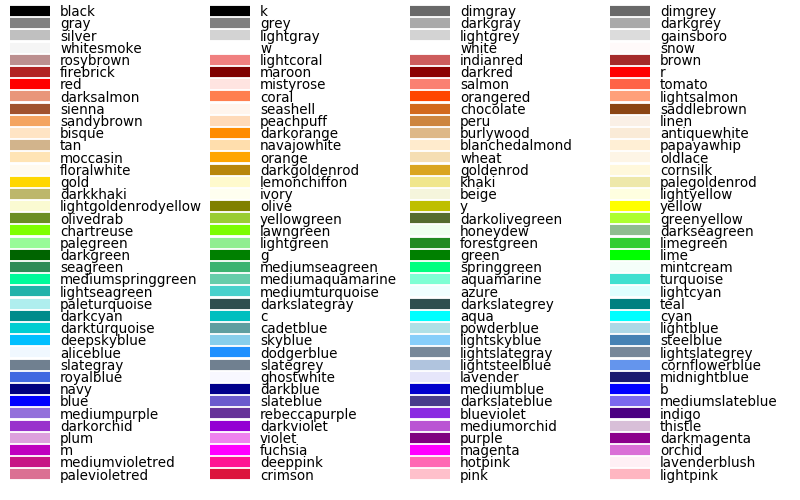

In [14]:
from IPython.display import Image
Image(filename="img/scc.png", width=800, height=800)

Okay! At last I would like to show you another practical implementation of Jointplot so let me plot it and then explain what I tried to achieve:

In [15]:
dataset = pd.DataFrame({"income":labour['Annual Income'],"birth":labour['Birth Rate']})

In [16]:
dataset.head(7)

,income,birth
0,22949,10.10
1,22389,9.70
2,22911,9.80
3,62636,3.85
4,60154,3.90
5,60124,4.30
6,52580,7.70


Text(0.8, 0.8, 'Random point')

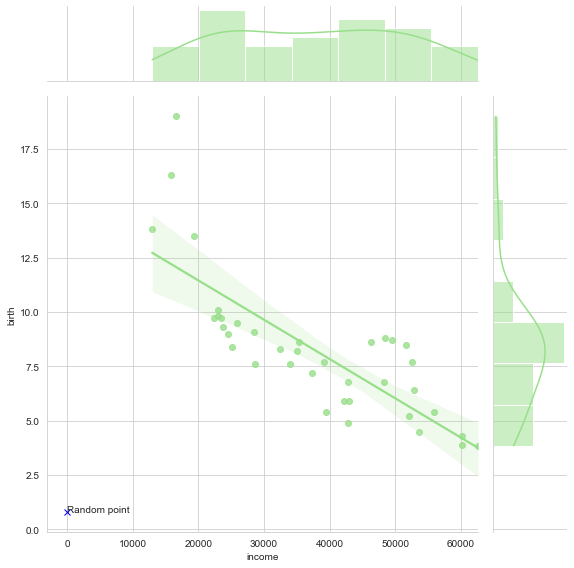

In [17]:
a = sns.jointplot(x="income", y="birth", data=dataset, kind="reg", size=8, color=tableau_20[5])
a.ax_joint.plot([0.8],[0.8],"bx")
a.ax_joint.text(0.8,0.8,"Random point")

The only difference in this plot from what we have been learning till now is that you can also overlay specific dots on this joint plot and accordingly assign a name to it. This gets quite handy when we need to point specifics in a presentation or such.

We're now well equipped to handle pretty much any scenario that would require a **Joint plot** or just a **Scatter plot** as well to achieve our goal. In the next lecture, we shall take up a new type of plot such as **[Additional Regression Plots](https://github.com/milaan9/12_Python_Seaborn_Module/blob/main/007_Seaborn_Additional_Regression_Plots.ipynb)** and try to infer. Meanwhile if you have any doubts, feel free to let me know. Till then Happy Visualizing!